In [1]:
from manifold import *
import matplotlib.pyplot as plt

 ### Definition of the sphere manifold in classical spherical coordinates

In [2]:
sphere = UVSphere(r=np.float64(1.0))

### Manifold visualization

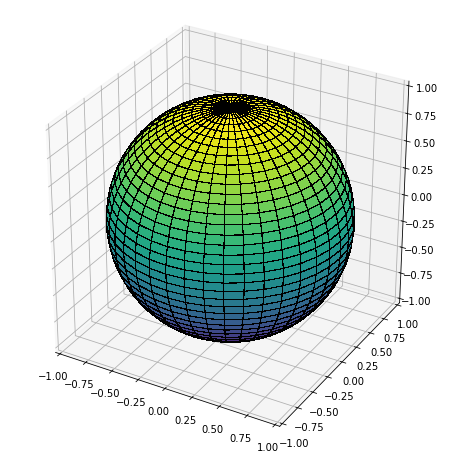

In [3]:
sphere.show()

### Plotting points

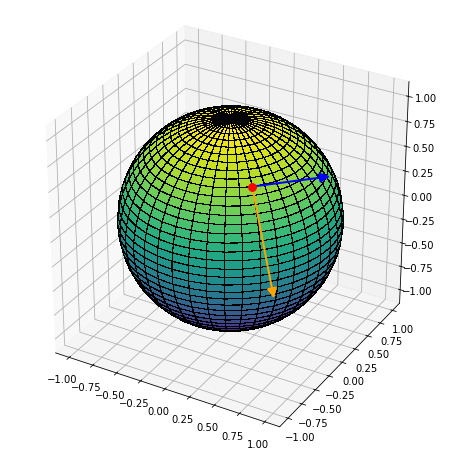

In [41]:
uv = torch.tensor([-np.pi/4, np.pi/4])
sphere.show_point(uv)

In [5]:
sphere.R([-np.pi/4, np.pi/4])

tensor([[[[ 0.0000,  0.0000],
          [ 0.0000,  0.0000]],

         [[ 0.0000,  1.0000],
          [-1.0000,  0.0000]]],


        [[[ 0.0000, -0.5000],
          [ 0.5000,  0.0000]],

         [[ 0.0000,  0.0000],
          [ 0.0000,  0.0000]]]], grad_fn=<SubBackward0>)

In [6]:
sphere.Ric([-np.pi/4, np.pi/4])

tensor([[0.5000, 0.0000],
        [0.0000, 1.0000]], grad_fn=<SumBackward1>)

In [7]:
sphere.ric([-np.pi/4, np.pi/4])

tensor(2.0000, grad_fn=<ViewBackward0>)

In [33]:
sphere.gaussian_curvature([-np.pi/4, np.pi/4])

tensor(1.0000, grad_fn=<DivBackward0>)

### Defining a curve through the manifold in extrinsic coordinates

In [8]:
# coordinate_path = lambda t: np.stack([0*t, t*np.pi]) # [u, v]
coordinate_path = coord_lerp([0.0, np.pi/4], [-np.pi/2,np.pi/4])

### Curve visualization

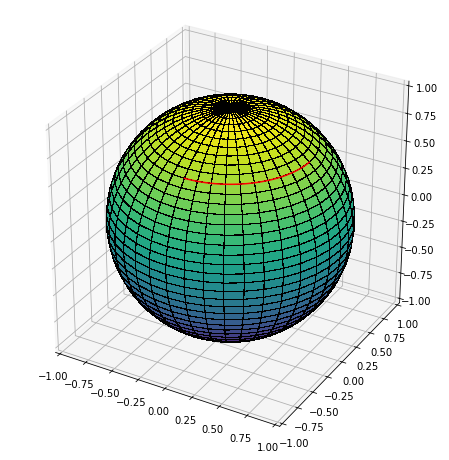

In [9]:
sphere.show_curve(coordinate_path)

In [10]:
sphere.compute_curve_length(coordinate_path)

/Users/robertwiebe/Documents/Math/Riemannian Geometry/manifold.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = integrate.quad(


1.1107230021366878

### Querying the Metric tensor & the Christoffel symbols

In [11]:
sphere.g(uv)

tensor([[0.5000, 0.0000],
        [0.0000, 1.0000]])

In [12]:
sphere.Gamma([0.0, torch.pi/4])

tensor([[[ 0.0000,  1.0000],
         [ 1.0000,  0.0000]],

        [[-0.5000,  0.0000],
         [ 0.0000,  0.0000]]], grad_fn=<MulBackward0>)

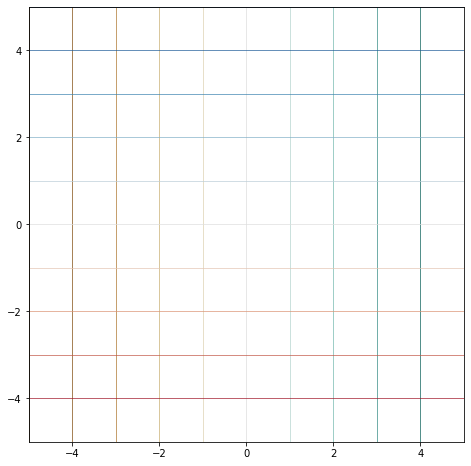

In [13]:
cartesian_plane = CartesianPlane()
cartesian_plane.show()

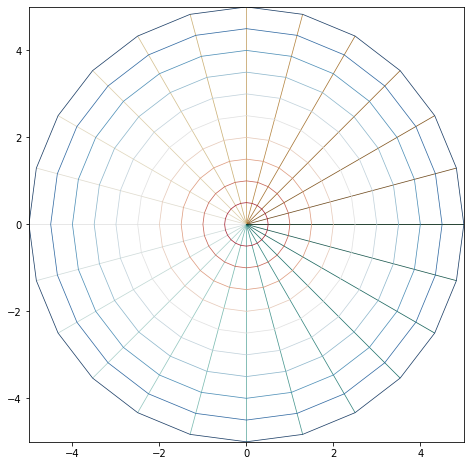

In [14]:
polar_plane = PolarPlane()
polar_plane.show()

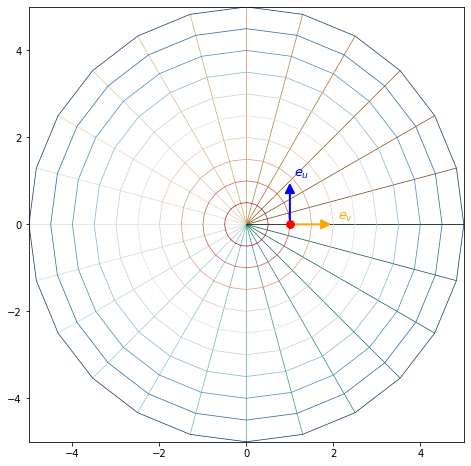

In [43]:
polar_plane.show_point([0.0, 1.0])

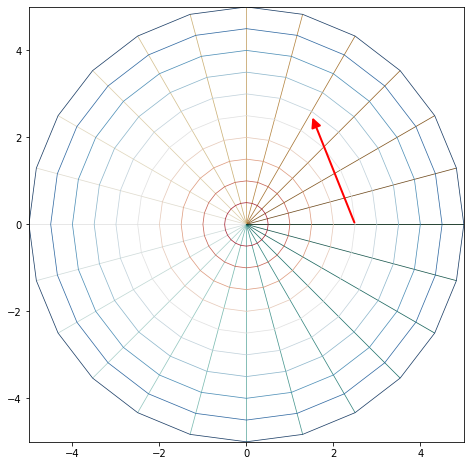

In [16]:
polar_plane.show_tangential_vector([0.0, 2.5], [1.0, -1.0])

In [17]:
polar_plane.R([0.0, 2.5])

tensor([[[[ 0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00]],

         [[ 0.0000e+00,  1.4901e-08],
          [-1.4901e-08,  0.0000e+00]]],


        [[[ 0.0000e+00,  5.9605e-08],
          [-5.9605e-08,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00]]]], grad_fn=<SubBackward0>)

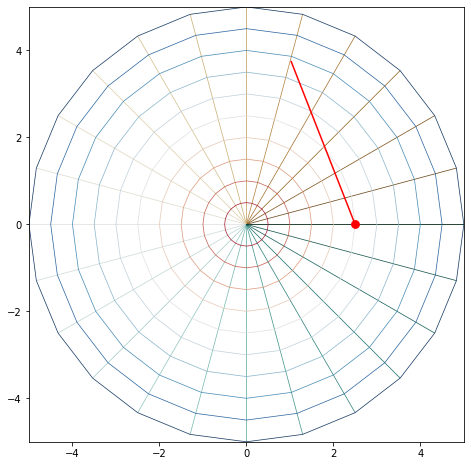

In [18]:
polar_plane.show_source_geodesic([0.0, 2.5], [1.0, -1.0], length=4.0)

In [19]:
polar_plane.g(torch.tensor([0.0, 2.0]))

tensor([[4., 0.],
        [0., 1.]], grad_fn=<MmBackward0>)

In [20]:
polar_plane.Gamma(torch.tensor([0.0, 1.0]))

tensor([[[ 0.,  1.],
         [ 1.,  0.]],

        [[-1.,  0.],
         [ 0.,  0.]]], grad_fn=<MulBackward0>)

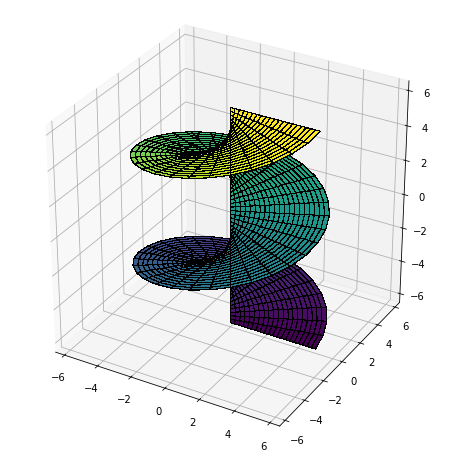

In [21]:
class CircularLadder(EmbeddedRiemannianManifold):
    embedding_dim = 3
    def __init__(self):
        pass

    coordinate_domain = [-2*torch.pi, 2*torch.pi], [0.0, 5]
    default_subdivisions = 61, 21
    
    def embedded(self, coords: torch.Tensor) -> torch.Tensor:
        phi, r = torch.as_tensor(coords)
        return torch.stack((
            r * torch.cos(phi),
            r * torch.sin(phi),
            phi
        ))

circ_ladder = CircularLadder()
circ_ladder.show()

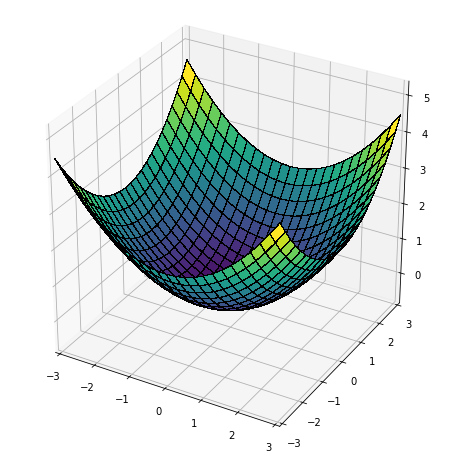

In [22]:
class Paraboloid(EmbeddedRiemannianManifold):
    embedding_dim = 3
    def __init__(self):
        pass

    coordinate_domain = [-3, 3], [-3, 3]
    default_subdivisions = 25, 25
    
    def embedded(self, coords: torch.Tensor) -> torch.Tensor:
        u, v = torch.as_tensor(coords)
        return torch.stack((
            u,
            v,
            0.25 * (torch.square(u) + torch.square(v))
        ))

paraboloid = Paraboloid()
paraboloid.show()

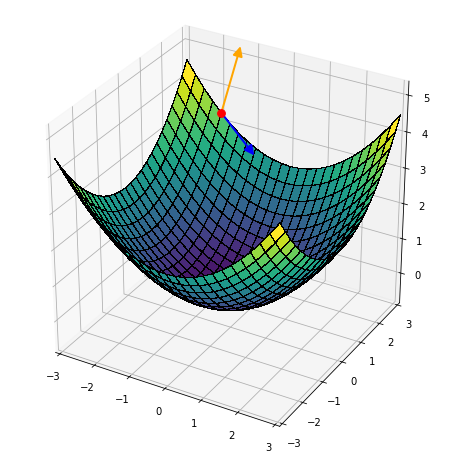

In [23]:
paraboloid.show_point([-2.0, 3.0])

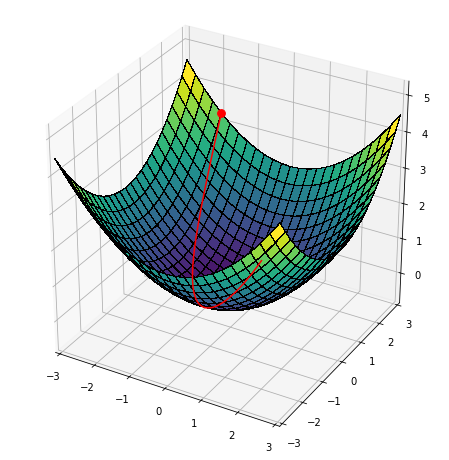

In [24]:
paraboloid.show_source_geodesic([-2.0, 3.0], [0.2, -2.0], length=10.0, resolution=25)

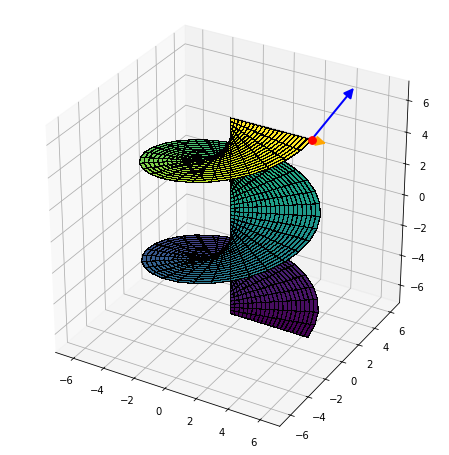

In [25]:
circ_ladder.show_point([2*np.pi, 5])

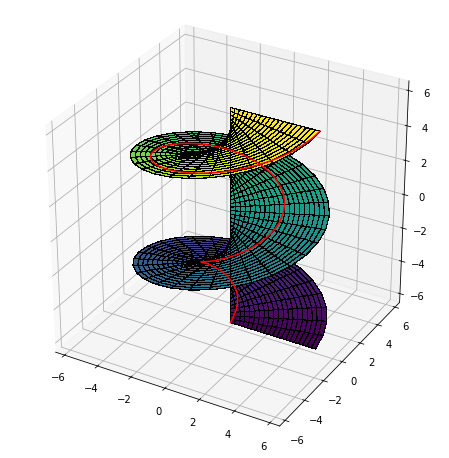

Curve length: 35.3967


In [26]:
curve = lambda t: np.stack(((-2+4*t)*np.pi, 5*t))
circ_ladder.show_curve(curve)
print(f'Curve length: {circ_ladder.compute_curve_length(curve):.4f}')

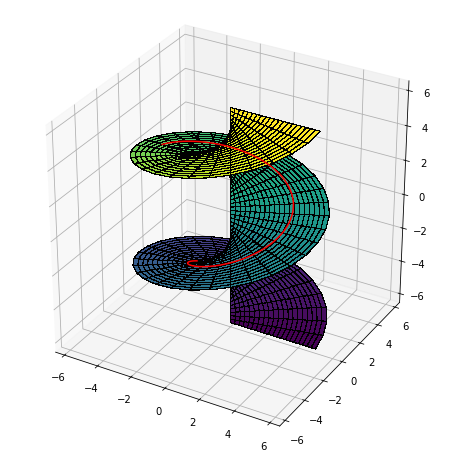

Curve length: 20.0075


In [27]:
curve = lambda t: np.stack([np.pi-t*2*np.pi, 4-2*t])
circ_ladder.show_curve(curve)
print(f'Curve length: {circ_ladder.compute_curve_length(curve):.4f}')

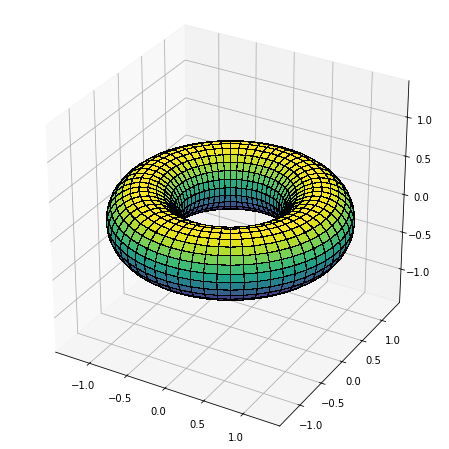

In [28]:
torus = Torus(1.0, 0.4)
torus.show()

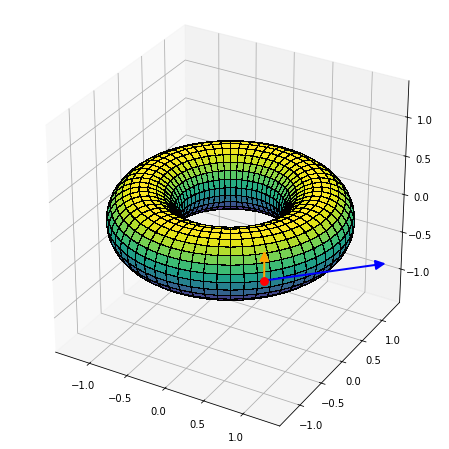

In [29]:
torus.show_point([-np.pi/4, 0.0])

In [34]:
torus.gaussian_curvature([-np.pi/4, 0.0])

tensor(1.7857, grad_fn=<DivBackward0>)

In [36]:
torus.gaussian_curvature([-np.pi/4, np.pi])

tensor(-4.1667, grad_fn=<DivBackward0>)

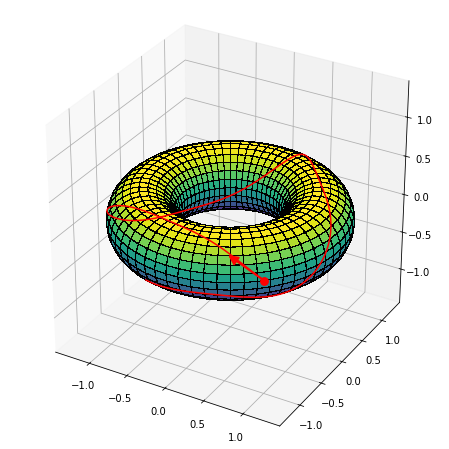

In [30]:
torus.show_source_geodesic([-np.pi/4, 0.0], [-0.3, 1.0], length=10.0, show_initial_vector=True)

In [31]:
torch.einsum('rvsm->rsmv', torch.zeros((1, 4, 2, 3))).shape

torch.Size([1, 2, 3, 4])

In [32]:
np.einsum('ijk->jki', np.zeros((1, 2, 3))).shape

(2, 3, 1)